# Mini Project 1

This dataset contains information on the insurance claim. each observation is different
policyholder with various features like the age of the person, the gender of the policyholder,
body mass index, providing an understanding of the body, number of children of the
policyholder, smoking state of the policyholder and individual medical costs billed by health
insurance

In [1]:
# importing library

In [2]:
import numpy as np # this library is used to handle the array of data
import pandas as pd # this library is used for data analysis
import matplotlib.pyplot as plt
import seaborn as sns
# above two libraries are used to visualize dataset in the from of graphs
from sklearn.model_selection import train_test_split
from sklearn import metrics
# above two libraries are used to split the data for training and testing and to calculate the accuracy of model 

In [3]:
# loading of data

data = pd.read_csv('insurance.csv')
print(data.head())

   age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1


In [4]:
# assigning another variable for data 

df = data
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
# shape : it gives number of rows and columns

df.shape

(1338, 8)

In [6]:
# size : it gives no of rows*column

df.size

10704

In [7]:
# describe : it gives statistical information

df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [8]:
# info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [9]:
#observing above information it is clear that given dataset does not have any null value or missing values present in the data

In [10]:
# checking null values present in the dataset

df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [11]:
# above cell gives that no null values present in any columns.

In [12]:
# from the above problem statement, it is clear that the target feature is insuranceclaim.
# thus finding corelation between the target feature and other columns of the data and visualize it through heatmap

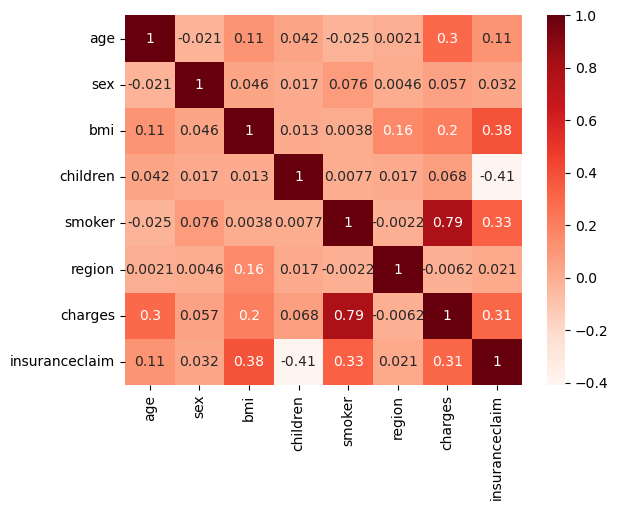

In [13]:
# Creating a matrix using age, sex, bmi, children, smoker, region, charges, insuranceclaim as rows and columns

data[['age', "sex", 'bmi','children','smoker','region','charges','insuranceclaim']].corr()

# plot the correlation matrix of salary, balance and age in data dataframe.

sns.heatmap(data[['age','sex','bmi','children','smoker','region','charges','insuranceclaim']].corr(),annot=True,cmap ='Reds')
plt.show()

In [14]:
# here through heat map and corelation score it is easy to find the feature to built the model for target feature
# from the above data we will choose those feature having corelation score near -0.5 and +0.5
# thus our useful features to apply model are bmi(0.38), children(-0.41), smoker(0.33) and charges(0.31)

In [15]:
# now cleaning those features

In [16]:
# finding outlaires using box plot for each usefull feature 
# smoker is the column with data yes(1)/no(0) therefore no outlair can be found in smoker

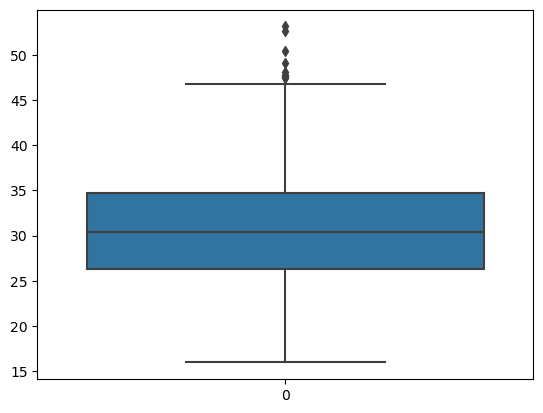

In [17]:
sns.boxplot(df['bmi'])
plt.show()

# outliers present in the bmi feature

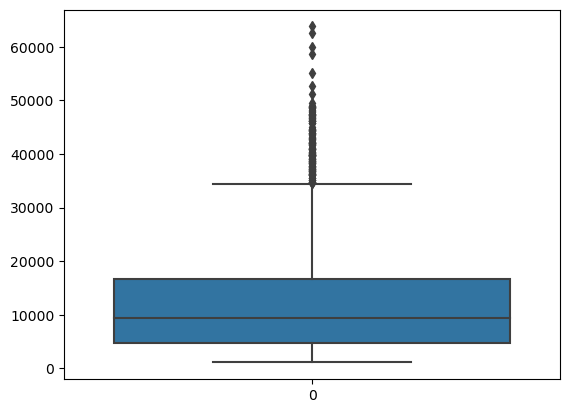

In [18]:
sns.boxplot(df['charges'])
plt.show()

# outliers present in charges feature

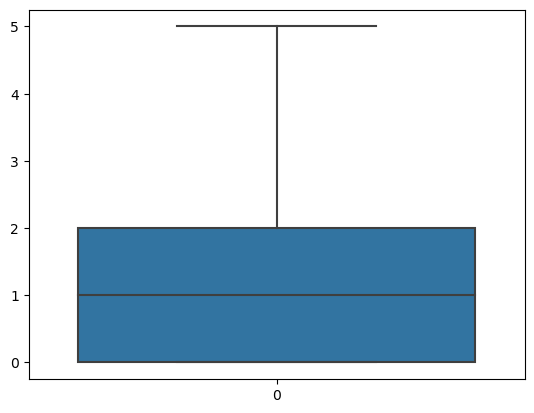

In [19]:
sns.boxplot(df['children'])
plt.show()

# no outlier present in children column

In [20]:
# here we find there are many outlairs for the bmi and charges feature
# now removing outlairs one by one by using iqr mathod

In [ ]:
# Removing outliers for bmi feature

Old Shape:  (1338, 8)
47.265 13.725000000000005


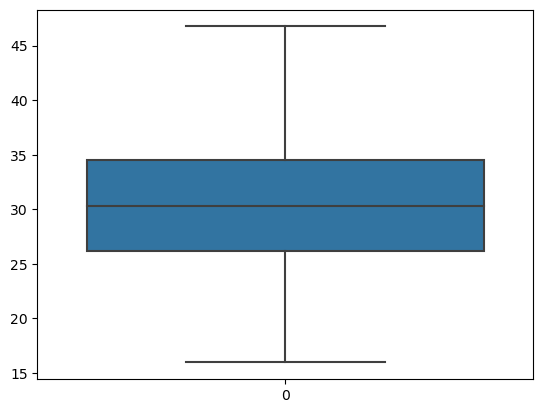

In [21]:
Q1BMI = np.percentile(df['bmi'], 25,interpolation = 'midpoint')
 
Q3BMI = np.percentile(df['bmi'], 75,interpolation = 'midpoint')
IQR1 = Q3BMI - Q1BMI
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper1=Q3BMI+1.5*IQR1
upper_array=np.array(df['bmi']>=upper1)

# Lower bound
lower1=Q1BMI-1.5*IQR1
lower_array=np.array(df['bmi']<=lower1)
print(upper1,lower1)
ndf=df[df["bmi"]<upper1]

sns.boxplot(ndf['bmi'])
plt.show()

In [ ]:
# Removing outliers for charges feature

Old Shape:  (1110, 8)
23478.585975 -7446.539825


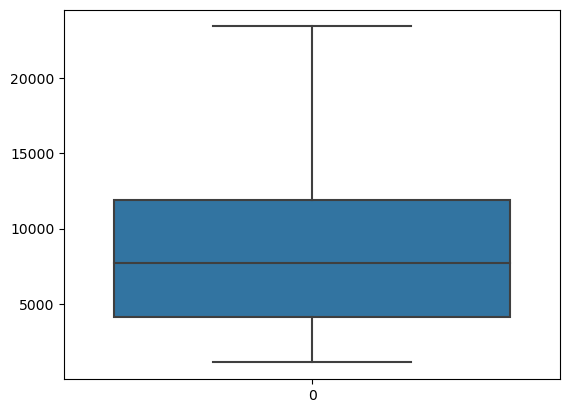

In [33]:
Q1CHG = np.percentile(ndf['charges'], 25,interpolation = 'midpoint')
 
Q3CHG = np.percentile(ndf['charges'], 75,interpolation = 'midpoint')
IQR2 = Q3CHG - Q1CHG
 
print("Old Shape: ", ndf.shape)
 
# Upper bound
upper2=Q3CHG+1.5*IQR2
upper_array2=np.array(ndf['charges']>=upper2)
# Lower bound
lower2=Q1CHG-1.5*IQR2
lower_array2=np.array(ndf['charges']<=lower2)
print(upper2,lower2)
ndf=ndf[ndf["charges"]<upper2]
ndf=ndf[ndf["charges"]>lower2]
sns.boxplot(ndf['charges'])
plt.show()

In [25]:
# scaling

from sklearn.preprocessing import MinMaxScaler

# initialize scaler
normalizer = MinMaxScaler()

# fit on data
normalizer.fit(ndf)

# transform
tdf = normalizer.transform(ndf)

# save into diff data
tdf = pd.DataFrame(tdf)
tdf.head()

,0,1,2,3,4,5,6,7
0,0.021739,0.0,0.387788,0.0,1.0,1.000000,0.475058,1.0
1,0.000000,1.0,0.578435,0.2,0.0,0.666667,0.018193,1.0
2,0.217391,1.0,0.553426,0.6,0.0,0.666667,0.100285,0.0
3,0.326087,1.0,0.219065,0.0,0.0,0.333333,0.628746,0.0
4,0.304348,1.0,0.419617,0.0,0.0,0.333333,0.082727,1.0


In [ ]:
# after removing the outlairs now defining the taring tet and target matrices

In [35]:
X = tdf.iloc[:,[2,3,4,6]].values
y = tdf.iloc[:,[7]].values

In [36]:
# spliting data into train test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 10)

In [37]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (893, 4)
X_test :  (298, 4)
y_train :  (893, 1)
y_test :  (298, 1)


In [38]:
# applying logestic regression model 

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [41]:
# defining prediction matrix

In [42]:
y_pred = lr.predict(X_test)
y_pred

array([1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1.

In [43]:
# Calculating accuracy matrix

acc = lr.score(X_test,y_test)
acc

0.87248322147651

# Accuracy of the Logistic Regression model is 87.24%

# In order to maximize the accuracy, we are now going to implement decission tree model

In [ ]:
# we already done with the EDA part and applied logestic regression model succesfully 

In [45]:
# importing Decission Tree
from sklearn.tree import DecisionTreeRegressor

In [46]:
# model impletation
reg = DecisionTreeRegressor()

# fitting
reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [47]:
# predicting

y_pred = reg.predict(X_test)
y_pred

array([0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1.

In [48]:
# calculate RMSE

rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

0.20067001862719533


In [49]:
# error
error = abs(y_pred-y_test)
error

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 1., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 1., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [50]:
acc_dt = metrics.accuracy_score(y_test,y_pred)

print("Accuracy : ",acc_dt)

Accuracy :  0.959731543624161


# We get the accuracy of the Decission Tree model is 95.97%